In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preprocessing the data

In [2]:
data = pd.read_csv('train_auto.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        8161 non-null   int64  
 1   TARGET_FLAG  8161 non-null   int64  
 2   TARGET_AMT   8161 non-null   float64
 3   KIDSDRIV     8161 non-null   int64  
 4   AGE          8155 non-null   float64
 5   HOMEKIDS     8161 non-null   int64  
 6   YOJ          7707 non-null   float64
 7   INCOME       7716 non-null   object 
 8   PARENT1      8161 non-null   object 
 9   HOME_VAL     7697 non-null   object 
 10  MSTATUS      8161 non-null   object 
 11  SEX          8161 non-null   object 
 12  EDUCATION    8161 non-null   object 
 13  JOB          7635 non-null   object 
 14  TRAVTIME     8161 non-null   int64  
 15  CAR_USE      8161 non-null   object 
 16  BLUEBOOK     8161 non-null   object 
 17  TIF          8161 non-null   int64  
 18  CAR_TYPE     8161 non-null   object 
 19  RED_CA

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


In [3]:
clean_data = data.copy()
clean_data = clean_data.drop(columns='INDEX')

We need to reformat the data to be sure that values with same signification (for a given attribute) are written exactly the same (especially with string attributes).

In [4]:
clean_data.INCOME = clean_data.INCOME.replace('\D', '', regex=True).astype(float)
clean_data.HOME_VAL = clean_data.HOME_VAL.replace('\D', '', regex=True).astype(float)
clean_data.BLUEBOOK = clean_data.BLUEBOOK.replace('\D', '', regex=True).astype(float)
clean_data.OLDCLAIM = clean_data.OLDCLAIM.replace('\D', '', regex=True).astype(float)
clean_data

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,0.0,0,60.0,0,11.0,67349.0,No,0.0,z_No,...,14230.0,11,Minivan,yes,4461.0,2,No,3,18.0,Highly Urban/ Urban
1,0,0.0,0,43.0,0,11.0,91449.0,No,257252.0,z_No,...,14940.0,1,Minivan,yes,0.0,0,No,0,1.0,Highly Urban/ Urban
2,0,0.0,0,35.0,1,10.0,16039.0,No,124191.0,Yes,...,4010.0,4,z_SUV,no,38690.0,2,No,3,10.0,Highly Urban/ Urban
3,0,0.0,0,51.0,0,14.0,NaN,No,306251.0,Yes,...,15440.0,7,Minivan,yes,0.0,0,No,0,6.0,Highly Urban/ Urban
4,0,0.0,0,50.0,0,NaN,114986.0,No,243925.0,Yes,...,18000.0,1,z_SUV,no,19217.0,2,Yes,3,17.0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8156,0,0.0,0,35.0,0,11.0,43112.0,No,0.0,z_No,...,27330.0,10,Panel Truck,yes,0.0,0,No,0,8.0,z_Highly Rural/ Rural
8157,0,0.0,1,45.0,2,9.0,164669.0,No,386273.0,Yes,...,13270.0,15,Minivan,no,0.0,0,No,2,17.0,Highly Urban/ Urban
8158,0,0.0,0,46.0,0,9.0,107204.0,No,332591.0,Yes,...,24490.0,6,Panel Truck,no,0.0,0,No,0,1.0,Highly Urban/ Urban
8159,0,0.0,0,50.0,0,7.0,43445.0,No,149248.0,Yes,...,22550.0,6,Minivan,no,0.0,0,No,0,11.0,Highly Urban/ Urban


In [5]:
clean_data.CAR_TYPE = clean_data.CAR_TYPE.astype(str).str.split('_').str[-1]
clean_data.MSTATUS = clean_data.MSTATUS.astype(str).str.split('_').str[-1]
clean_data.SEX = clean_data.SEX.astype(str).str.split('_').str[-1]
clean_data.EDUCATION = clean_data.EDUCATION.astype(str).str.split('_').str[-1]
clean_data.JOB = clean_data.JOB.astype(str).str.split('_').str[-1]
clean_data.CAR_TYPE = clean_data.CAR_TYPE.astype(str).str.split('_').str[-1]
clean_data.URBANICITY = clean_data.URBANICITY.astype(str).str.split('_').str[-1]


clean_data.EDUCATION = clean_data.EDUCATION.astype(str).str.split('<').str[-1]

In [6]:
clean_data

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,0.0,0,60.0,0,11.0,67349.0,No,0.0,No,...,14230.0,11,Minivan,yes,4461.0,2,No,3,18.0,Highly Urban/ Urban
1,0,0.0,0,43.0,0,11.0,91449.0,No,257252.0,No,...,14940.0,1,Minivan,yes,0.0,0,No,0,1.0,Highly Urban/ Urban
2,0,0.0,0,35.0,1,10.0,16039.0,No,124191.0,Yes,...,4010.0,4,SUV,no,38690.0,2,No,3,10.0,Highly Urban/ Urban
3,0,0.0,0,51.0,0,14.0,NaN,No,306251.0,Yes,...,15440.0,7,Minivan,yes,0.0,0,No,0,6.0,Highly Urban/ Urban
4,0,0.0,0,50.0,0,NaN,114986.0,No,243925.0,Yes,...,18000.0,1,SUV,no,19217.0,2,Yes,3,17.0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8156,0,0.0,0,35.0,0,11.0,43112.0,No,0.0,No,...,27330.0,10,Panel Truck,yes,0.0,0,No,0,8.0,Highly Rural/ Rural
8157,0,0.0,1,45.0,2,9.0,164669.0,No,386273.0,Yes,...,13270.0,15,Minivan,no,0.0,0,No,2,17.0,Highly Urban/ Urban
8158,0,0.0,0,46.0,0,9.0,107204.0,No,332591.0,Yes,...,24490.0,6,Panel Truck,no,0.0,0,No,0,1.0,Highly Urban/ Urban
8159,0,0.0,0,50.0,0,7.0,43445.0,No,149248.0,Yes,...,22550.0,6,Minivan,no,0.0,0,No,0,11.0,Highly Urban/ Urban


For categorical attributes, we discretize them by distinguish ordinal and nominal. Education is ordinal for instance, because inequality is meaningful as well. 

In [7]:
dict_map_yes_no = {'yes':1.0, 'no':0.0, 'Yes':1.0, 'No':0.0}
dict_map_education = {'High School':0.0, 'Bachelors':1.0, 'Masters':2.0, 'PhD':3.0}

clean_data.PARENT1 = clean_data.PARENT1.map(dict_map_yes_no)
clean_data.MSTATUS = clean_data.MSTATUS.map(dict_map_yes_no)
clean_data.RED_CAR = clean_data.RED_CAR.map(dict_map_yes_no)
clean_data.REVOKED = clean_data.REVOKED.map(dict_map_yes_no)

clean_data.EDUCATION = clean_data.EDUCATION.map(dict_map_education)

One hot encoder for the other nominal attributes with more than two values

In [8]:
final_data = pd.get_dummies(clean_data, dtype=np.float64)
final_data

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_USE_Commercial,CAR_USE_Private,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_SUV,CAR_TYPE_Sports Car,CAR_TYPE_Van,URBANICITY_Highly Rural/ Rural,URBANICITY_Highly Urban/ Urban
0,0,0.0,0,60.0,0,11.0,67349.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0.0,0,43.0,0,11.0,91449.0,0.0,257252.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.0,0,35.0,1,10.0,16039.0,0.0,124191.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,0.0,0,51.0,0,14.0,NaN,0.0,306251.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.0,0,50.0,0,NaN,114986.0,0.0,243925.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8156,0,0.0,0,35.0,0,11.0,43112.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8157,0,0.0,1,45.0,2,9.0,164669.0,0.0,386273.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8158,0,0.0,0,46.0,0,9.0,107204.0,0.0,332591.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8159,0,0.0,0,50.0,0,7.0,43445.0,0.0,149248.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
final_data = final_data.fillna(final_data.median())

In [10]:
# Check of the datatypes: either int or float OK
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TARGET_FLAG                     8161 non-null   int64  
 1   TARGET_AMT                      8161 non-null   float64
 2   KIDSDRIV                        8161 non-null   int64  
 3   AGE                             8161 non-null   float64
 4   HOMEKIDS                        8161 non-null   int64  
 5   YOJ                             8161 non-null   float64
 6   INCOME                          8161 non-null   float64
 7   PARENT1                         8161 non-null   float64
 8   HOME_VAL                        8161 non-null   float64
 9   MSTATUS                         8161 non-null   float64
 10  EDUCATION                       8161 non-null   float64
 11  TRAVTIME                        8161 non-null   int64  
 12  BLUEBOOK                        81

## Exploratory Data Analysis

In [11]:
for value in final_data.TARGET_FLAG.unique():
    print(f'Class {value}: {final_data.TARGET_FLAG.value_counts()[value] / len(final_data.TARGET_FLAG) * 100} %')

Class 0: 73.61842911407915 %
Class 1: 26.38157088592084 %


The baseline performance in terms of accuracy is 0.73. Our two classes are inequally distributed, we'll have to keep that in mind during the analysis.

## Train-test split

In [12]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(final_data, test_size=0.2)

X_train, y_train = train_data.drop(columns=['TARGET_FLAG', 'TARGET_AMT']), train_data.TARGET_FLAG
X_val, y_val = test_data.drop(columns=['TARGET_FLAG', 'TARGET_AMT']), test_data.TARGET_FLAG

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(6528, 39) (6528,)
(1633, 39) (1633,)


## Normalization

In [13]:
X_train_norm = (X_train - X_train.mean()) / X_train.std()
X_val_norm = (X_val - X_train.mean()) / X_train.std()

In [14]:
X_train_norm

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,EDUCATION,TRAVTIME,...,CAR_USE_Commercial,CAR_USE_Private,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_SUV,CAR_TYPE_Sports Car,CAR_TYPE_Van,URBANICITY_Highly Rural/ Rural,URBANICITY_Highly Urban/ Urban
665,-0.340637,0.836845,-0.644995,0.621931,-0.086393,-0.390276,0.200491,0.819773,-0.959257,2.543900,...,-0.765703,0.765703,-0.594761,-0.301488,2.205557,-0.618864,-0.359439,-0.321029,1.982400,-1.982400
5535,1.603135,-0.787782,1.151688,0.123745,-0.760285,-0.390276,-0.240714,0.819773,-0.959257,0.472738,...,-0.765703,0.765703,-0.594761,-0.301488,-0.453331,-0.618864,2.781685,-0.321029,-0.504362,0.504362
2676,-0.340637,-1.716140,-0.644995,0.621931,0.134632,-0.390276,0.523262,0.819773,0.045884,0.096163,...,1.305789,-1.305789,-0.594761,-0.301488,-0.453331,1.615617,-0.359439,-0.321029,-0.504362,0.504362
4592,-0.340637,1.301024,-0.644995,0.621931,-0.610953,-0.390276,-0.048773,0.819773,-0.959257,0.409975,...,1.305789,-1.305789,-0.594761,-0.301488,2.205557,-0.618864,-0.359439,-0.321029,-0.504362,0.504362
869,-0.340637,-1.135916,0.253347,0.372838,-1.147881,-0.390276,-1.238210,0.819773,-0.959257,-1.284612,...,1.305789,-1.305789,-0.594761,-0.301488,-0.453331,-0.618864,2.781685,-0.321029,-0.504362,0.504362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,1.603135,-0.439648,0.253347,0.123745,0.052661,-0.390276,0.452278,0.819773,0.045884,0.472738,...,-0.765703,0.765703,-0.594761,-0.301488,-0.453331,1.615617,-0.359439,-0.321029,-0.504362,0.504362
800,-0.340637,0.024532,-0.644995,-0.374441,0.991062,-0.390276,1.112523,0.819773,1.051026,-0.217650,...,-0.765703,0.765703,-0.594761,-0.301488,-0.453331,-0.618864,-0.359439,3.114507,-0.504362,0.504362
6396,-0.340637,-1.484050,1.151688,0.372838,-0.663165,2.561895,-1.238210,-1.219663,-0.959257,-0.594225,...,1.305789,-1.305789,-0.594761,-0.301488,2.205557,-0.618864,-0.359439,-0.321029,1.982400,-1.982400
7716,-0.340637,-1.368006,2.948370,0.123745,-1.326218,-0.390276,-1.238210,0.819773,-0.959257,1.539700,...,-0.765703,0.765703,1.681089,-0.301488,-0.453331,-0.618864,-0.359439,-0.321029,-0.504362,0.504362


## Models

In [15]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [16]:
dict_results = {
    'method':[],
    'accuracy':[],
    'precision':[],
    'recall':[],
    'f1':[],
    'auc':[],
    'roc_curve':[],
}

In this problem, we want to minimize the number of False Negatives. We want to be sure to not miss possible TARGET_FLAG equal to 1. Thus, we will use recall as a metric.
Having a good accuracy is also important so we'll work with both.

### Logistic regression

In a classification problem, logistic regression is always a good first step. It is easy to interpret and simple to compute (and not too computationally expensive).

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
# Hyperparameter tuning
solvers = ['lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(
    estimator=LogisticRegression(), 
    param_grid=grid, 
    n_jobs=-1, 
    cv=cv, 
    scoring=['accuracy', 'recall'],
    refit='recall',
    error_score=0
)

grid_result = grid_search.fit(X_train_norm, y_train)
print(f"{grid_result.best_score_}, with {grid_result.best_params_}")

0.41893784849721194, with {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [19]:
logit_model = LogisticRegression(C=0.01, penalty='l2', solver='liblinear')
logit_model.fit(X_train_norm, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [20]:
y_logit = logit_model.predict(X_val_norm)
y_logit_prob = logit_model.predict_proba(X_val_norm)

In [21]:
dict_results['method'].append('Logistic Regression (RIDGE)')
dict_results['accuracy'].append(accuracy_score(y_val, y_logit))
dict_results['precision'].append(precision_score(y_val, y_logit))
dict_results['recall'].append(recall_score(y_val, y_logit))
dict_results['f1'].append(f1_score(y_val, y_logit))
dict_results['auc'].append(roc_auc_score(y_val, y_logit_prob[:,1]))
dict_results['roc_curve'].append(roc_curve(y_val, y_logit_prob[:,1], pos_label=1))

### k-Nearest Neighbor

k-Nearest Neighbor is a classication technique that is pretty natural because we are looking to neighbors of the sample we want to predict.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
# Hyperparameter tuning
n_neighbors = [3, 4, 5, 6, 7,8]
algorithm = ['ball_tree', 'kd_tree']

grid = dict(n_neighbors=n_neighbors, algorithm=algorithm)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(), 
    param_grid=grid, 
    n_jobs=-1, 
    cv=cv, 
    scoring=['accuracy', 'recall'],
    refit='recall',
    error_score=0
)

grid_result = grid_search.fit(X_train_norm, y_train)
print(f"{grid_result.best_score_}, with {grid_result.best_params_}")

0.37925789927013914, with {'algorithm': 'ball_tree', 'n_neighbors': 3}


In [24]:
knn_model = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')
knn_model.fit(X_train_norm, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)

In [25]:
y_knn = knn_model.predict(X_val_norm)
y_knn_prob = knn_model.predict_proba(X_val_norm)

In [26]:
dict_results['method'].append('k-Nearest Neighbor')
dict_results['accuracy'].append(accuracy_score(y_val, y_knn))
dict_results['precision'].append(precision_score(y_val, y_knn))
dict_results['recall'].append(recall_score(y_val, y_knn))
dict_results['f1'].append(f1_score(y_val, y_knn))
dict_results['auc'].append(roc_auc_score(y_val, y_knn_prob[:,1]))
dict_results['roc_curve'].append(roc_curve(y_val, y_knn_prob[:,1], pos_label=1))

### Ada Boost

Ada Boost is an Ensemble method, which is often used in Kaggle competitions and pretty recent

In [27]:
from sklearn.ensemble import AdaBoostClassifier

In [28]:
# Hyperparameter tuning
n_estimators = [10, 50, 100, 500, 1000]
learning_rate = [0.01, 0.03, 0.1, 0.3, 1, 3]

grid = dict(n_estimators=n_estimators, learning_rate=learning_rate)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(
    estimator=AdaBoostClassifier(), 
    param_grid=grid, 
    n_jobs=-1, 
    cv=cv,
    scoring=['accuracy', 'recall'],
    refit='accuracy',
    error_score=0
)

grid_result = grid_search.fit(X_train_norm, y_train)
print(f"{grid_result.best_score_}, with {grid_result.best_params_}")

0.7887057375586015, with {'learning_rate': 0.1, 'n_estimators': 500}


In [29]:
adab_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.3)
adab_model.fit(X_train_norm, y_train)

AdaBoostClassifier(learning_rate=0.3, n_estimators=100)

In [30]:
y_adab = adab_model.predict(X_val_norm)
y_adab_prob = adab_model.predict_proba(X_val_norm)

In [31]:
dict_results['method'].append('Ada Boost')
dict_results['accuracy'].append(accuracy_score(y_val, y_adab))
dict_results['precision'].append(precision_score(y_val, y_adab))
dict_results['recall'].append(recall_score(y_val, y_adab))
dict_results['f1'].append(f1_score(y_val, y_adab))
dict_results['auc'].append(roc_auc_score(y_val, y_adab_prob[:,1]))
dict_results['roc_curve'].append(roc_curve(y_val, y_adab_prob[:,1], pos_label=1))

### Models comparison (ROC, Confusion Matrix, Metrics, Variable importance)

#### Metrics

In [32]:
for i in range(len(dict_results['method'])):
    print(dict_results['method'][i])
    print(f"Accuracy: {dict_results['accuracy'][i]}")
    print(f"Precision: {dict_results['precision'][i]}")
    print(f"Recall: {dict_results['recall'][i]}")
    print(f"F1: {dict_results['f1'][i]}")
    print("\n")

Logistic Regression (RIDGE)
Accuracy: 0.7917942437232088
Precision: 0.6893939393939394
Recall: 0.41363636363636364
F1: 0.5170454545454546


k-Nearest Neighbor
Accuracy: 0.7379056950398041
Precision: 0.5179640718562875
Recall: 0.3931818181818182
F1: 0.4470284237726098


Ada Boost
Accuracy: 0.7936313533374157
Precision: 0.7172995780590717
Recall: 0.38636363636363635
F1: 0.5022156573116692




#### ROC Curve

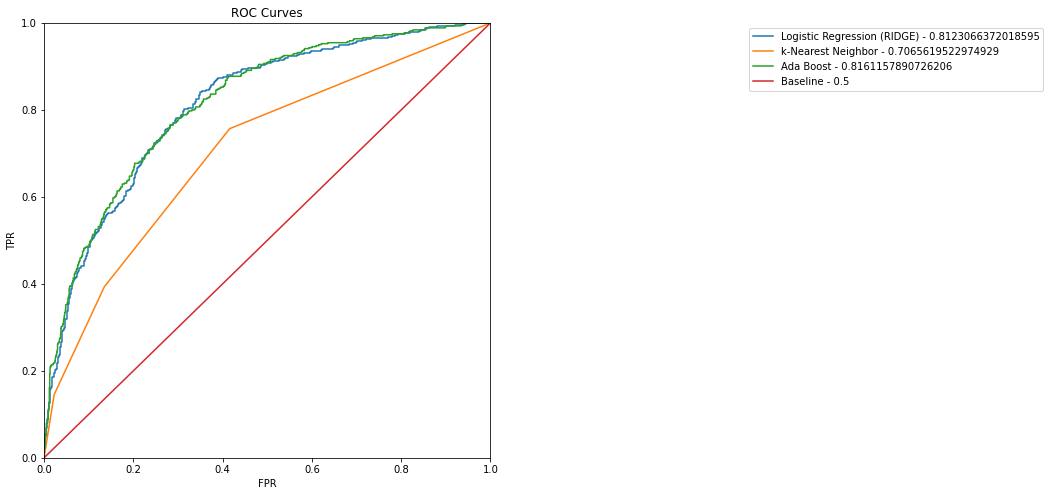

In [33]:
plt.figure(1, figsize=(8,8))
for i in range(len(dict_results['method'])):
    method = dict_results['method'][i]
    auc = dict_results['auc'][i]
    plt.plot(
        dict_results['roc_curve'][i][0], 
        dict_results['roc_curve'][i][1],
        label=(f'{method} - {auc}')
    )

plt.plot([0.0, 1.0], [0.0, 1.0], label='Baseline - 0.5')
plt.title('ROC Curves')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(bbox_to_anchor=(2.25, 1))

plt.show()

## Prediction

In [48]:
def preprocessing(data):
    clean_data = data.copy()
    clean_data = clean_data.drop(columns=['INDEX', 'TARGET_FLAG', 'TARGET_AMT'])

    clean_data.INCOME = clean_data.INCOME.replace('\D', '', regex=True).astype(float)
    clean_data.HOME_VAL = clean_data.HOME_VAL.replace('\D', '', regex=True).astype(float)
    clean_data.BLUEBOOK = clean_data.BLUEBOOK.replace('\D', '', regex=True).astype(float)
    clean_data.OLDCLAIM = clean_data.OLDCLAIM.replace('\D', '', regex=True).astype(float)

    clean_data.CAR_TYPE = clean_data.CAR_TYPE.astype(str).str.split('_').str[-1]
    clean_data.MSTATUS = clean_data.MSTATUS.astype(str).str.split('_').str[-1].astype(str)
    clean_data.SEX = clean_data.SEX.astype(str).str.split('_').str[-1]
    clean_data.EDUCATION = clean_data.EDUCATION.astype(str).str.split('_').str[-1]
    clean_data.JOB = clean_data.JOB.astype(str).str.split('_').str[-1]
    clean_data.CAR_TYPE = clean_data.CAR_TYPE.astype(str).str.split('_').str[-1]
    clean_data.URBANICITY = clean_data.URBANICITY.astype(str).str.split('_').str[-1]


    clean_data.EDUCATION = clean_data.EDUCATION.astype(str).str.split('<').str[-1]

    dict_map_yes_no = {'yes':1, 'no':0, 'Yes':1, 'No':0}
    dict_map_education = {'High School':0, 'Bachelors':1, 'Masters':2, 'PhD':3}

    clean_data.PARENT1 = clean_data.PARENT1.map(dict_map_yes_no)
    clean_data.MSTATUS = clean_data.MSTATUS.map(dict_map_yes_no)
    clean_data.RED_CAR = clean_data.RED_CAR.map(dict_map_yes_no)
    clean_data.REVOKED = clean_data.REVOKED.map(dict_map_yes_no)

    clean_data.EDUCATION = clean_data.EDUCATION.map(dict_map_education)

    final_data = pd.get_dummies(clean_data, dtype=np.float64)
    final_data = final_data.fillna(final_data.median())
    return final_data

In [49]:
test_data = pd.read_csv('test_auto.csv')
test_data

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,...,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,...,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,...,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
3,18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,...,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
4,21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,...,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,10279,NaN,NaN,0,46.0,0,0.0,$0,No,$0,...,"$1,500",6,Sports Car,no,"$20,519",1,Yes,3,8.0,z_Highly Rural/ Rural
2137,10281,NaN,NaN,0,46.0,0,12.0,"$43,501",No,"$134,977",...,"$16,080",3,Minivan,no,$0,0,No,2,1.0,z_Highly Rural/ Rural
2138,10285,NaN,NaN,0,55.0,0,10.0,"$141,083",No,"$393,624",...,"$21,110",10,Sports Car,no,$0,0,No,0,22.0,z_Highly Rural/ Rural
2139,10294,NaN,NaN,0,51.0,0,10.0,"$128,523",No,$0,...,"$32,960",6,Panel Truck,no,"$3,995",3,No,1,15.0,Highly Urban/ Urban


In [52]:
X_test = preprocessing(test_data)

In [53]:
adab_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
pd.Series(data=adab_model.predict(X_test), index=test_data['INDEX'].values).to_csv('predicted_test_auto.csv')